In [1]:
import numpy as np
from physicsinformed_static import PhysicsInformedBarModel
import torch
import matplotlib.pyplot as plt
import utilities
import math

In [2]:
samples = 100

In [3]:
E =  1.44*(10**9)
nu = 0.38
bh = 24*(10**-6)
arr = np.zeros(100)
arr[-1] = 100*(10**-6)
distLoad = lambda x: torch.tensor(arr)
u0 = [0,0,100,0,0,0]

In [4]:
pinnModel = PhysicsInformedBarModel(E, nu, bh, u0, dist_load = distLoad)

check 2


In [5]:
epochs = 1000
learningRate = 1e-2

pinnModel.train(epochs, optimizer='Adam', lr=learningRate)

Epoch: 0/999		Differential equation loss = 0.000001		Boundary condition loss = 0.019126		Total loss = 0.019127
Epoch: 100/999		Differential equation loss = 0.000001		Boundary condition loss = 0.000001		Total loss = 0.000002
Epoch: 200/999		Differential equation loss = 0.000001		Boundary condition loss = 0.000000		Total loss = 0.000001
Epoch: 300/999		Differential equation loss = 0.000001		Boundary condition loss = 0.000000		Total loss = 0.000001
Epoch: 400/999		Differential equation loss = 0.000001		Boundary condition loss = 0.000000		Total loss = 0.000001
Epoch: 500/999		Differential equation loss = 0.000001		Boundary condition loss = 0.000000		Total loss = 0.000001
Epoch: 600/999		Differential equation loss = 0.000001		Boundary condition loss = 0.000000		Total loss = 0.000001
Epoch: 700/999		Differential equation loss = 0.000001		Boundary condition loss = 0.000000		Total loss = 0.000001
Epoch: 800/999		Differential equation loss = 0.000001		Boundary condition loss = 0.000000		Total l

In [6]:
x_test = utilities.generate_grid_1d(440.1*(10**-6), samples)
u_test = pinnModel.get_displacements(x_test)
u_analytic = lambda x: 5 *np.log(1+x)*0
print(x_test[0],u_test[0])

tensor([0.], grad_fn=<SelectBackward0>) tensor([1.8626e-09], grad_fn=<SelectBackward0>)


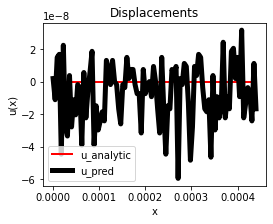

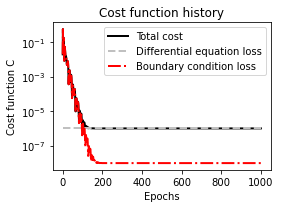

In [7]:
utilities.plot_displacements_bar(x_test, u_test, u_analytic)

pinnModel.plot_training_history()